In [2]:
from Bern3D import *
import numpy as np
import numba
from numba.typed import List

In [3]:
numba.set_num_threads(4)

In [110]:
priors = np.linspace(0.1,0.9,9)
foo = [Bernoulli3Diffusion(theta=0.9, cost=-.001, sigma=(0.7,0.7), pvalid=0.9, task_prior=tp, sample_actions=(List(['x0', 'x1', 'z']),), state_range=25) for tp in priors]
for f in foo:
    optimize_value(f)

0.22026429756097565
0.0880928862974496
0.05496861730402747
0.03840983146762644
0.02781996523813335
0.02070235417013433
0.01563616193678974
0.011984666646191022
0.009275997711616246
0.007220159809461335
0.005637581590006713
0.004409421698618243
0.003460593174774651
0.002729974141208791
0.0021622146402663356
0.0017172581608495552
0.00136636885838326
0.0010884828718442652
0.0008677900691610452
0.0006921945375714111
0.0005523122017940807
0.00044079214917747134
0.0003518384235364769
0.0002808612455073023
0.00022421562072605372
0.000179001460965722
0.00014290855097021105
0.00011409511819504559
9.109209515634209e-05
7.272730872864841e-05
5.806527672091999e-05
4.635930915197761e-05
3.701335290273722e-05
2.955157371542505e-05
2.359409404539825e-05
1.8837634494284217e-05
1.5040064405558162e-05
1.2008070473967791e-05
9.587313166581346e-06
7.654568569548381e-06
6.1114549475549396e-06
4.879424298942503e-06
3.8957637590320005e-06
3.1104031921191932e-06
2.483366412509014e-06
1.9827362568447526e-06
1.

In [111]:
rt_inc = [f.performance((True, False), True, True, (0,0), 0, int(2e4))[0] for f in foo]
rt_con = [f.performance((True, True), True, True, (0,0), 0, int(2e4))[0] for f in foo]

Text(0.5, 1.0, 'Switch effect')

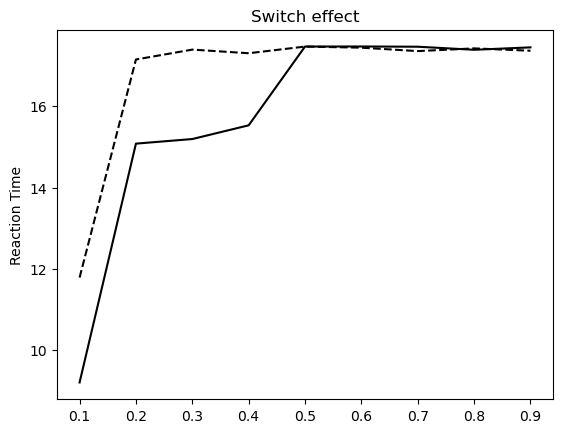

In [112]:
fig, ax = plt.subplots()
ax.plot(priors, rt_con, color='black')
ax.plot(priors, rt_inc, linestyle='--', color='black')
# ax.set_xlabel('Switch   ' + r'$z_0$' + '  Repeat')
ax.set_ylabel('Reaction Time')
ax.set_title('Switch effect')

In [119]:
f = foo[2]
zs = np.array([-8, -4, -2, 0, 2, 4, 8])
Y = solution_as_array(f)[:, :, zs + f.state_range]
x = np.arange(-f.state_range - .5, f.state_range + 1)

In [120]:
(f.pvalid, f.task_prior)

(0.9, 0.30000000000000004)

Text(0.5, 0, '$y_w$')

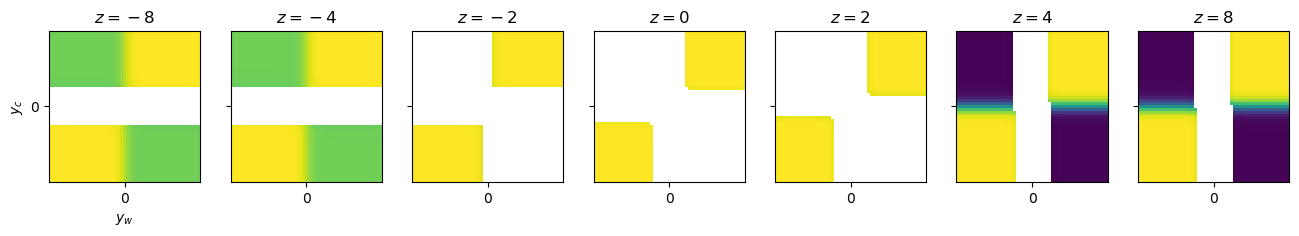

In [121]:
ymin = np.min(Y)
ymax = np.max(Y)
fig, axs = plt.subplots(1, len(zs), sharey=True, figsize=(16,16))
for i, ax in enumerate(axs):
    ax.pcolormesh(x, x, Y[:,:,i], vmin=ymin, vmax=ymax)
    ax.set_title(r'$z='+str(zs[i])+'$')
    ax.set_aspect(1)
    ax.set_xticks([0])
    ax.set_yticks([])
axs[0].set_yticks([0])
axs[0].set_ylabel(r'$y_c$')
axs[0].set_xlabel(r'$y_w$')


In [21]:
z0s = np.linspace(-4,4,5, dtype=int)
rt_inc = [foo.performance((True, False), True, True, (0,0), z0, int(2e4))[0] for z0 in z0s]
rt_con = [foo.performance((True, True), True, True, (0,0), z0, int(2e4))[0] for z0 in z0s]

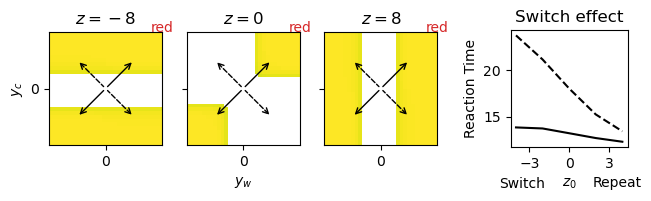

In [22]:
bigfig = plt.figure(layout='constrained')
fig_region, fig_rt = bigfig.subfigures(1, 2, width_ratios=(2.4, 1))

ymin = 0.6
ymax = np.max(Y)
axs = fig_region.subplots(1, len(zs), sharey=True)
for i, ax in enumerate(axs):
    ax.pcolormesh(x, x, Y[:,:,i], vmin=ymin, vmax=ymax)
    ax.annotate('', (0,0), (7.5,7.5), arrowprops=dict(arrowstyle='<-')) #color='tab:purple'
    ax.annotate('', (0,0), (-7.5,-7.5), arrowprops=dict(arrowstyle='<-')) #color='tab:purple', 
    ax.annotate('', (0,0), (-7.5,7.5), arrowprops=dict(arrowstyle='<-', linestyle='--')) #color='tab:orange
    ax.annotate('', (0,0), (7.5,-7.5), arrowprops=dict(arrowstyle='<-', linestyle='--')) #color='tab:orange'
    ax.annotate('blue',(-19,-19),color='blue')
    ax.annotate('blue',(-19,15),color='tab:red')
    ax.annotate('red',(12,15),color='tab:red')
    ax.annotate('red',(12,-19),color='blue')
    ax.set_title(r'$z='+str(zs[i])+'$')
    ax.set_aspect(1)
    ax.set_xticks([0])
    ax.set_yticks([])
axs[0].set_yticks([0])
axs[0].set_ylabel(r'$y_c$')
axs[1].set_xlabel(r'$y_w$')

ax_rt = fig_rt.subplots()
ax_rt.plot(z0s, rt_con, color='black')
ax_rt.plot(z0s, rt_inc, linestyle='--', color='black')
ax_rt.set_aspect(np.diff(ax_rt.get_xlim())[0] / np.diff(ax_rt.get_ylim())[0])
# ax_rt.set_xlabel('Switch   ' + r'$z_0$' + '  Repeat')
ax_rt.set_xlabel(r'$z_0$')
ax_rt.set_ylabel('Reaction Time')
ax_rt.set_title('Switch effect')
ax_rt.annotate('Repeat', xy=(.7,-0.34), xycoords="axes fraction")
ax_rt.annotate('Switch', xy=(-.1,-0.35), xycoords="axes fraction")
ax_rt.set_xticks([-3,0,3])

plt.savefig('fig2.pdf', bbox_inches='tight')